Data Preview:
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   05-08-2022          Kanyon  
1     Debit Card   12-12-2021  Forum Istanbul  
2           Cash   09-11-2021       Metrocity  
3    Credit Card   16-05-2021    Metropol AVM  
4           Cash   24-10-2021          Kanyon  
Columns in DataFrame:
Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')
Enter Customer ID to get recommendations and predictions: C151197

Recommended Product C

<ipython-input-2-ba9b96d2e8d6>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='category', y='quantity', palette='viridis')


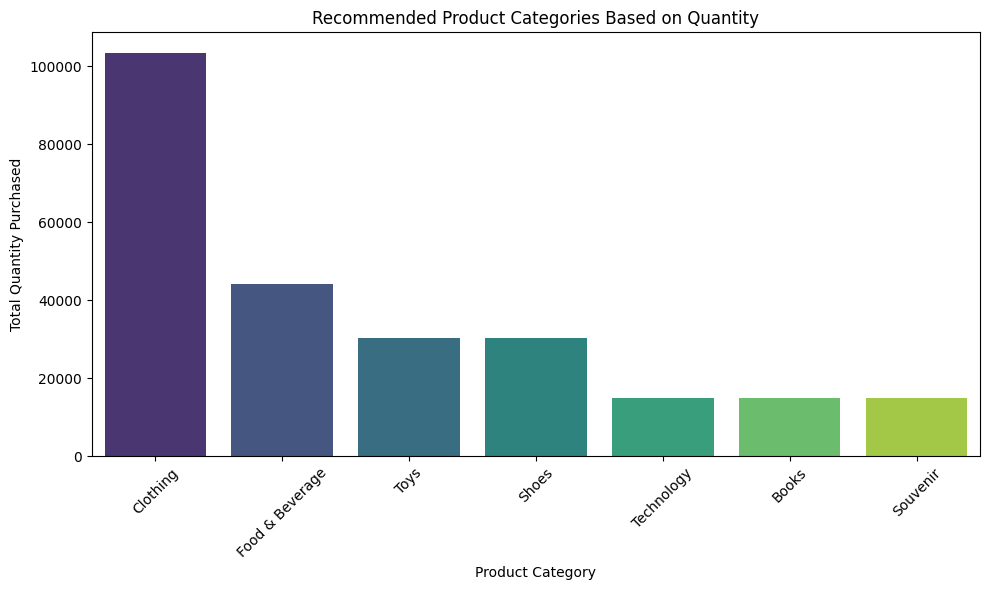

<ipython-input-2-ba9b96d2e8d6>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'], format='%d-%m-%Y')
<ipython-input-2-ba9b96d2e8d6>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='Set2')


Not enough data to make predictions for Customer ID: C151197.

Estimated spending per item for Customer ID C151197: $40.66
Payment methods counts for Customer ID C151197:
payment_method
Cash    1
Name: count, dtype: int64


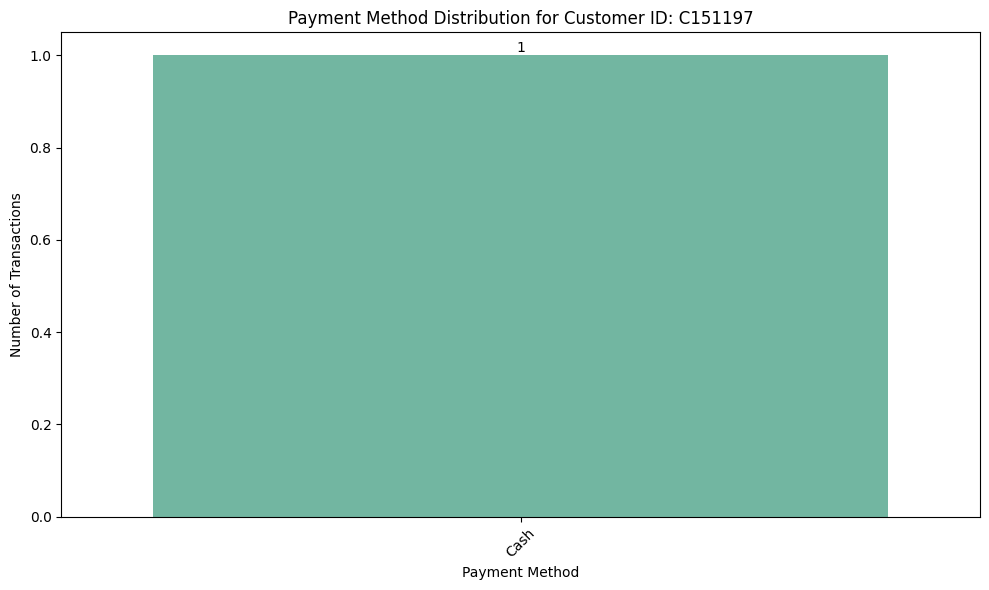

Consider targeting this customer with credit card ads.
Consider targeting this customer with PayPal ads.


<ipython-input-2-ba9b96d2e8d6>:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'], format='%d-%m-%Y')


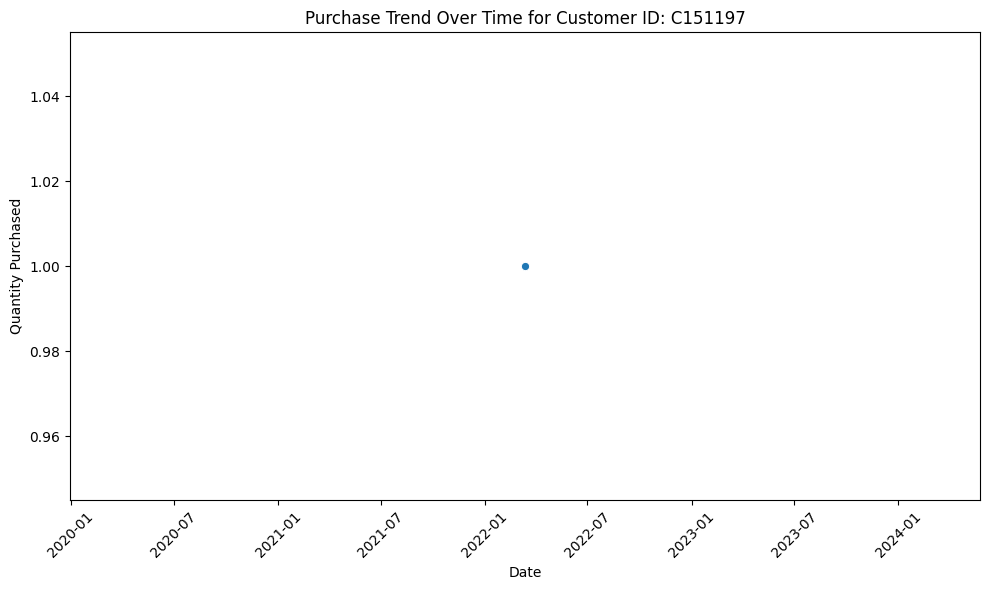

<ipython-input-2-ba9b96d2e8d6>:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spending_by_category, x='category', y='price', palette='Blues_d')


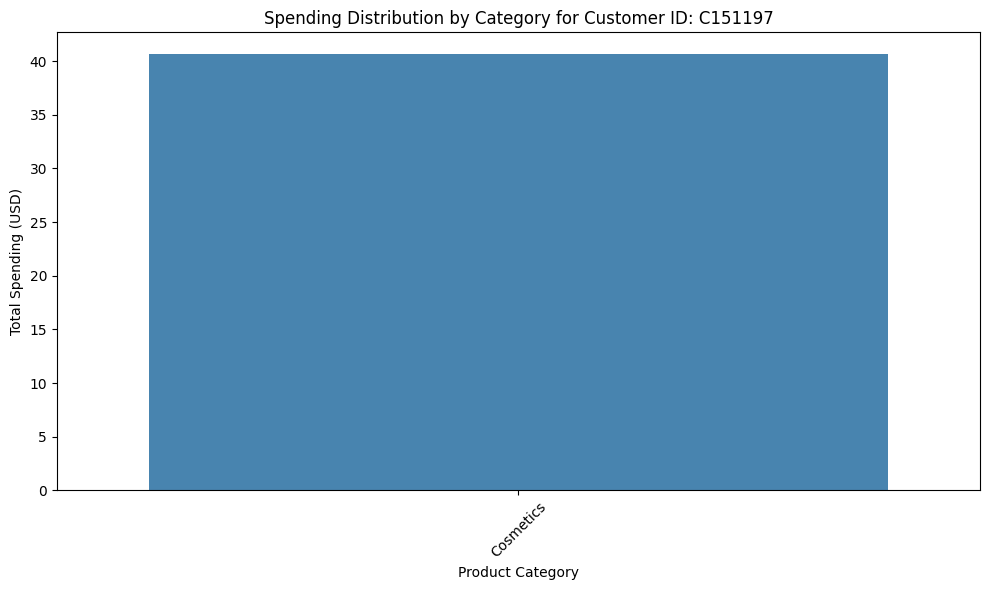

<ipython-input-2-ba9b96d2e8d6>:186: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_by_category, x='category', y='quantity', palette='Greens_d')


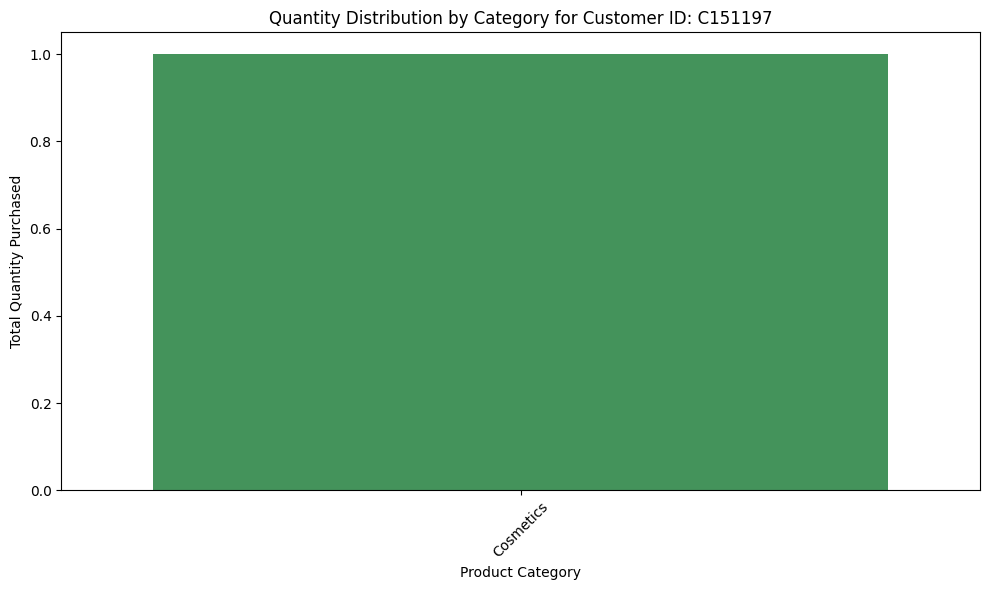

<ipython-input-2-ba9b96d2e8d6>:198: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_category_popularity, x='category', y='quantity', palette='Purples_d')


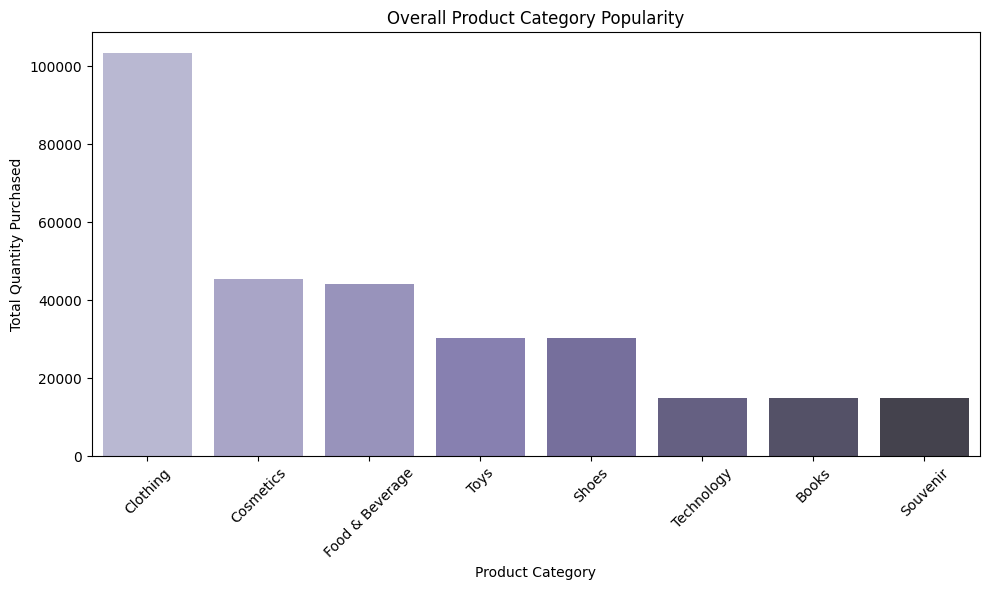

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the data from the CSV file
df = pd.read_csv('/content/sales.csv')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

# Inspect DataFrame columns
print("Columns in DataFrame:")
print(df.columns)

def recommend_product_categories(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Get the product categories the customer interacted with
    interacted_categories = customer_data['category'].unique()

    # Filter the main DataFrame to exclude categories the customer has already interacted with
    filtered_data = df[~df['category'].isin(interacted_categories)]

    # Aggregate quantity by product category
    category_clicks = filtered_data.groupby('category')['quantity'].sum().reset_index()

    # Sort categories by quantity in descending order
    recommended_categories = category_clicks.sort_values(by='quantity', ascending=False)

    return recommended_categories

def plot_recommendations(recommendations):
    # Check if there are recommendations to plot
    if recommendations is not None and not recommendations.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=recommendations, x='category', y='quantity', palette='viridis')
        plt.title('Recommended Product Categories Based on Quantity')
        plt.xlabel('Product Category')
        plt.ylabel('Total Quantity Purchased')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout
        plt.show()  # Show the plot
    else:
        print("No recommendations available to plot.")

def future_purchase_prediction(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Use 'invoice_date' (or any other appropriate column for the date)
    customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'], format='%d-%m-%Y')
    purchase_data = customer_data.groupby('invoice_date')['quantity'].sum().reset_index()
    purchase_data.columns = ['ds', 'y']  # Rename columns for Prophet

    # Check for valid data
    if purchase_data.shape[0] < 2:
        print(f"Not enough data to make predictions for Customer ID: {customer_id}.")
        return None

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(purchase_data)

    # Create a dataframe to hold future dates (next 30 days)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Future Purchase Prediction for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Purchases')
    plt.show()

    return forecast  # Return the forecast data for further processing

def predict_spending(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Calculate total spending
    total_spending = customer_data['price'].sum()
    total_quantity = customer_data['quantity'].sum()

    # Average spending per item
    average_spending_per_item = total_spending / total_quantity if total_quantity > 0 else 0

    # Highlighting the estimated spending per item
    print(f"\nEstimated spending per item for Customer ID {customer_id}: "
          f"\033[1;32m${average_spending_per_item:.2f}\033[0m")  # Green colored text

    return average_spending_per_item


def analyze_payment_method(df, customer_id):
    # Filter the data for the specified customer ID
    customer_data = df[df['customer_id'] == customer_id]

    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return None

    # Analyze payment methods used by the customer
    payment_methods = customer_data['payment_method'].value_counts()

    # Print payment methods counts for debugging
    print(f"Payment methods counts for Customer ID {customer_id}:")
    print(payment_methods)

    if payment_methods.empty:
        print("No payment methods found for this customer.")
        return None

    # Plot payment method distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='Set2')
    plt.title(f'Payment Method Distribution for Customer ID: {customer_id}')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)

    # Adding data labels on bars
    for index, value in enumerate(payment_methods.values):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    credit_card_used = payment_methods.get('Credit Card', 0)
    paypal_used = payment_methods.get('PayPal', 0)

    # Determine if the customer might benefit from ads
    if credit_card_used == 0:
        print("Consider targeting this customer with credit card ads.")
    if paypal_used == 0:
        print("Consider targeting this customer with PayPal ads.")

# Additional Graphs
def purchase_trend_over_time(df, customer_id):
    customer_data = df[df['customer_id'] == customer_id]
    customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'], format='%d-%m-%Y')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=customer_data, x='invoice_date', y='quantity', marker='o')
    plt.title(f'Purchase Trend Over Time for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Purchased')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def spending_distribution_by_category(df, customer_id):
    customer_data = df[df['customer_id'] == customer_id]
    spending_by_category = customer_data.groupby('category')['price'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=spending_by_category, x='category', y='price', palette='Blues_d')
    plt.title(f'Spending Distribution by Category for Customer ID: {customer_id}')
    plt.xlabel('Product Category')
    plt.ylabel('Total Spending (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def quantity_distribution_by_category(df, customer_id):
    customer_data = df[df['customer_id'] == customer_id]
    quantity_by_category = customer_data.groupby('category')['quantity'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=quantity_by_category, x='category', y='quantity', palette='Greens_d')
    plt.title(f'Quantity Distribution by Category for Customer ID: {customer_id}')
    plt.xlabel('Product Category')
    plt.ylabel('Total Quantity Purchased')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def overall_category_popularity(df):
    overall_category_popularity = df.groupby('category')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=overall_category_popularity, x='category', y='quantity', palette='Purples_d')
    plt.title('Overall Product Category Popularity')
    plt.xlabel('Product Category')
    plt.ylabel('Total Quantity Purchased')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Get user input for customer ID
customer_id = input("Enter Customer ID to get recommendations and predictions: ")  # No longer forcing to integer

recommendations = recommend_product_categories(df, customer_id)

if recommendations is not None and not recommendations.empty:
    print("\nRecommended Product Categories based on quantity:")
    print(recommendations)

    # Plot the recommendations
    plot_recommendations(recommendations)

    # Predict future purchases
    forecast = future_purchase_prediction(df, customer_id)

    # Add spending prediction
    estimated_spending = predict_spending(df, customer_id)

    # Analyze payment methods
    analyze_payment_method(df, customer_id)

    # Additional Graphs
    purchase_trend_over_time(df, customer_id)
    spending_distribution_by_category(df, customer_id)
    quantity_distribution_by_category(df, customer_id)
    overall_category_popularity(df)

else:
    print("No recommendations available.")
